In [1]:
from keras.models import load_model

In [2]:
LSTMModel = load_model('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/solarModel2/ 24- 0.0019.ckpt')

In [3]:
import pandas as pd
data = pd.read_excel('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/filterdSolarGenerationUOM.xlsx')

In [4]:
test_data = data.tail(5274)

In [5]:
import numpy as np

def dataSequence(df,window_size, step_size, forecast_horizon):
    generation = df['Adjusted_Generation'].values
    solar_irr = df['solarradiation'].values
    num_samples = len(generation)
    X = []
    y = []

    for start in range(0, num_samples - window_size - forecast_horizon + 1, step_size):
        end = start + window_size
        forecast_end = end + forecast_horizon
        window_dem = generation[start:end-1]
        window_irr = solar_irr[start:end-1]
        X.append([window_dem,window_irr])
        y.append(generation[end-1:forecast_end-1])  

    return np.array(X), np.array(y)

In [6]:
test_data

,Unnamed: 0,timestamp,temp,humidity,windgust,cloudcover,visibility,solarradiation,conditions,solarenergy,Solar_Generation,Adjusted_Generation
20854,21054,2024-08-25 06:00:00,26.0,93.95,4.3,50.5,6.0,0.0,Partially cloudy,0.0,0.000000,0.000000
20855,21055,2024-08-25 07:00:00,27.0,88.66,5.7,90.0,6.0,6.9,Partially cloudy,0.0,0.000000,0.000000
20856,21056,2024-08-25 08:00:00,28.6,79.57,7.3,89.8,9.3,99.0,"Rain, Partially cloudy",0.4,6.666672,3.038174
20857,21057,2024-08-25 09:00:00,29.1,69.54,14.1,100.0,8.0,310.9,Overcast,1.1,18.333348,8.804739
20858,21058,2024-08-25 10:00:00,30.9,70.34,18.5,50.0,10.0,530.1,Partially cloudy,1.9,31.666692,18.441195
...,...,...,...,...,...,...,...,...,...,...,...,...
26123,26323,2025-04-01 19:00:00,29.6,67.09,8.2,50.0,10.0,25.4,Partially cloudy,0.1,1.666668,0.935114
26124,26324,2025-04-01 20:00:00,30.4,70.14,6.7,88.4,12.9,0.0,Partially cloudy,0.0,0.000000,0.000000
26125,26325,2025-04-01 21:00:00,29.5,67.45,7.8,50.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000
26126,26326,2025-04-01 22:00:00,29.0,70.49,5.7,90.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000


In [7]:
from sklearn.preprocessing import MinMaxScaler
genScaler = MinMaxScaler()
irrScaler = MinMaxScaler()
test_data['Adjusted_Generation'] = genScaler.fit_transform(test_data[['Adjusted_Generation']])
test_data['solarradiation'] = irrScaler.fit_transform(test_data[['solarradiation']])

/var/folders/9z/jhl761ys4zxdmlymdmcfs3jm0000gn/T/ipykernel_96893/2729199694.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Adjusted_Generation'] = genScaler.fit_transform(test_data[['Adjusted_Generation']])
/var/folders/9z/jhl761ys4zxdmlymdmcfs3jm0000gn/T/ipykernel_96893/2729199694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['solarradiation'] = irrScaler.fit_transform(test_data[['solarradiation']])


In [11]:
x,y = dataSequence(test_data,49,1,1)

In [12]:
x[0]


array([[0.        , 0.        , 0.05274279, 0.15285051, 0.32013966,
        0.33553579, 0.47496096, 0.47632806, 0.47609124, 0.49023335,
        0.37425002, 0.23579049, 0.12204021, 0.01372581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10573407, 0.19771599, 0.2885728 , 0.37601766,
        0.50404315, 0.57366922, 0.54513732, 0.49472772, 0.51105111,
        0.22002656, 0.14212032, 0.01636989, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.00684796, 0.09825328, 0.30855498, 0.52610163,
        0.63834855, 0.77878126, 0.76697102, 0.76528384, 0.78791187,
        0.59825328, 0.38785232, 0.16980945, 0.03791187, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
   

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
pred = LSTMModel.predict(x).flatten()
pred_ns = genScaler.inverse_transform([pred]).flatten()

mae = mean_absolute_error(pred_ns,genScaler.inverse_transform(y).flatten())
mse = mean_squared_error(pred_ns,genScaler.inverse_transform(y).flatten())
mape = mean_absolute_percentage_error(pred_ns,genScaler.inverse_transform(y).flatten())
r2 = r2_score(pred_ns,genScaler.inverse_transform(y).flatten())

print("MSE :" + str(mse))
print("MAE :" + str(mae))
print("R2 :" + str(r2))
print("MAPE :" + str(mape))

164/164 [==============================] - 1s 1ms/step
MSE :7.337536865366265
MAE :1.4685129388107003
R2 :0.9335574390572351
MAPE :0.6346072276014723


In [19]:
df_results = pd.DataFrame({'Predicted_Generation': pred_ns, 'Actual_Generation': genScaler.inverse_transform(y).flatten()})

In [20]:
df_results

,Predicted_Generation,Actual_Generation
0,0.185409,0.000000
1,0.284666,0.000000
2,3.282054,3.500873
3,13.282102,11.757605
4,20.759627,18.373552
...,...,...
5220,4.510051,5.989903
5221,0.815031,0.935114
5222,0.208278,0.000000
5223,0.158897,0.000000


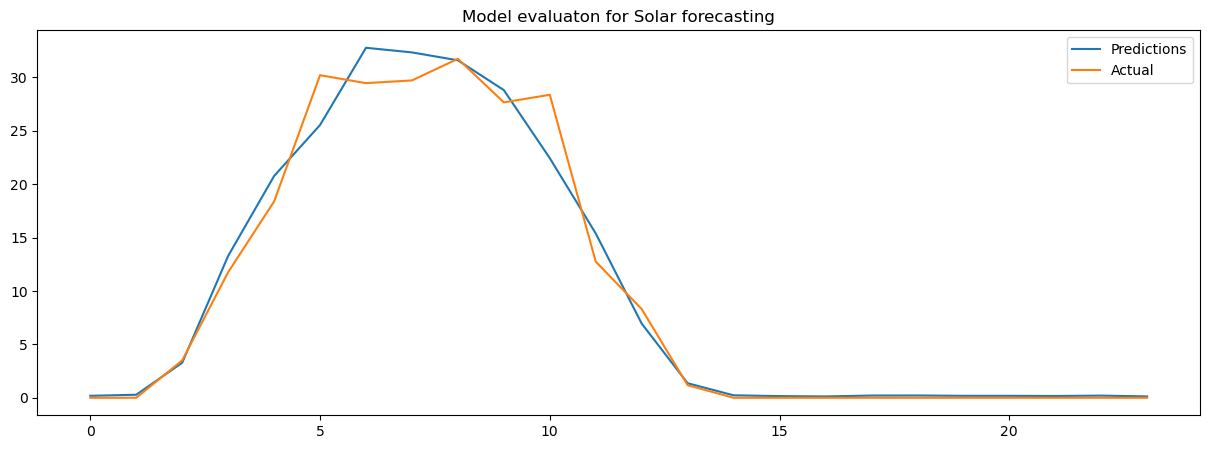

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df_results['Predicted_Generation'].values[:24],label = 'Predictions')
plt.plot(df_results['Actual_Generation'].values[:24],label = 'Actual')
plt.title('Model evaluaton for Solar forecasting')
plt.legend()

In [22]:
df_results.to_excel('Results_LSTM.xlsx')

Develop neural network to concatanate the two model predictions